<a href="https://colab.research.google.com/github/vmtmxmf5/-/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/train (1).csv', index_col='PassengerId')
df.reset_index(inplace=True, drop=True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### 성별에 따른 생존률의 차이가 있을 것이라고 가설을 세웠고, 이를 bar plot을 통해 확인해보고자 한다.

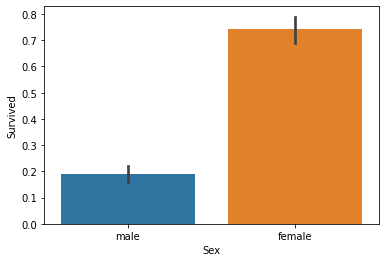

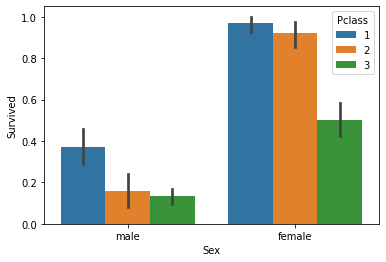

In [ ]:
titanic = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
titanic_gender = titanic[['Sex', 'Survived', 'Pclass']]

sns.barplot(x='Sex',
            y='Survived',
            data=titanic_gender
            )
plt.show()
sns.barplot(x='Sex',
            y='Survived',
            hue='Pclass',
            data=titanic_gender
            )
plt.show()

### 여기서 확인한 점은 크게 두 가지가 있다.

1. 여성이 남성에 비해 생존률이 50% 정도 높다.

2. 남성의 경우 1클래스와 2,3 클래스 생존률 차이가 큰 반면,
여성의 경우 1,2 클래스와 3클래스의 생존률 차이가 크다.

### 그러나 남성 1클래스 탑승자의 생존률이 여성 3클래스 생존자의 수보다 작다.

### **2번은 상식과 반대**된다. 일반적으로 클래스 탑승자보다 성별이 생존에 더 강한 영향을 끼친다고 보여진다. 따라서 추후 분류 알고리즘에 꼭 추가해야 할 요인으로 여겨진다. 


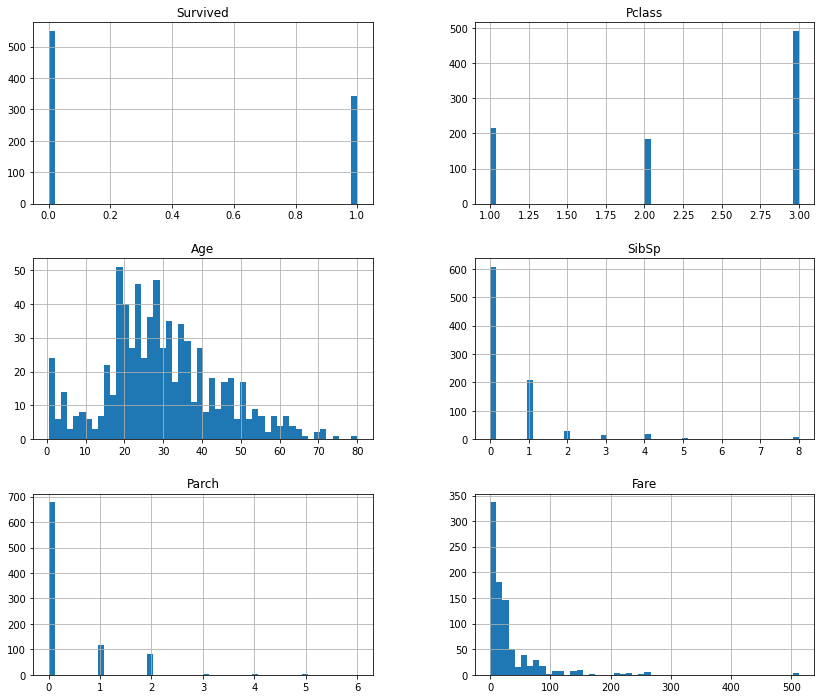

In [ ]:
titanic.hist(bins=50, figsize=(14, 12))
plt.show()

<feature 설명>
column을 살펴보면 나이는 20~30대 탑승자가 가장 많고,

클래스 탑승자는 의외로 1클래스보다 2클래스 탑승자의 수가 적다.

또, 요금은 100미만이 대부분을 차지한다.

부모 자식과 같이 탑승하지 않은 승객이 같이 탑승한 승객보다 많다.


<label 설명>
생존 데이터를 보면 다소 불균형한 값을 보인다. 생존자의 수가 사망자보다 많으므로, 이 비율을 지켜 Stratified split을 시행하도록 해야 한다.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic['SibSpParchMul'] = titanic['SibSp'] * titanic['Parch']
titanic['SibSpParchPlus'] = titanic['SibSp'] + titanic['Parch']

titanic_cor = titanic[['Survived', 'Fare', 'Age', 'SibSp', 'Parch', 'SibSpParchMul', 'SibSpParchPlus']]
titanic_cor = titanic_cor.corr().sort_values(by='Survived', ascending=False)['Survived']
titanic_cor

Survived          1.000000
Fare              0.257307
Parch             0.081629
SibSpParchPlus    0.016639
SibSp            -0.035322
Age              -0.077221
SibSpParchMul    -0.077257
Name: Survived, dtype: float64

### feature engineering을 통해 SibSp과 Parch을 조합해 보았는데 유의미한 상관관계를 파악하지 못했다.  
### Age의 상관관계가 너무 낮아 아예 pd.cut을 통해 범주 변수로 바꾸고자 한다(feature engineering)

In [ ]:
titanic['Age_cat'] = pd.cut(
    titanic['Age'],
    bins=[0, 18, 35, 50, np.inf],
    labels=[1, 2, 3, 4]
)
titanic.head(10)
# sns.countplot(x='Age', data=titanic)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSpParchMul,SibSpParchPlus,Age_cat
0,0,3,male,22.0,1,0,7.2500,S,0,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,1,3
2,1,3,female,26.0,0,0,7.9250,S,0,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,1,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,2
5,0,3,male,NaN,0,0,8.4583,Q,0,0,NaN
6,0,1,male,54.0,0,0,51.8625,S,0,0,4
7,0,3,male,2.0,3,1,21.0750,S,3,4,1
8,1,3,female,27.0,0,2,11.1333,S,0,2,2
9,1,2,female,14.0,1,0,30.0708,C,0,1,1


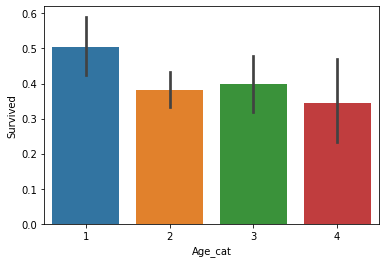

In [ ]:
sns.barplot(x='Age_cat',
            y='Survived',
            data=titanic
            )
titanic = titanic.drop(['Age','SibSpParchMul','SibSpParchPlus','SibSp','Parch'], axis=1)

In [ ]:
most_freq = titanic['Age_cat'].value_counts(dropna=True).idxmax()
titanic['Age_cat'].fillna(most_freq, inplace=True)

most_freq = titanic['Embarked'].value_counts(dropna=True).idxmax()
titanic['Embarked'].fillna(most_freq, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder()
cat = titanic[['Pclass','Sex','Embarked','Age_cat']]
cat = encoder.fit_transform(cat)

scaler = StandardScaler()
fare = titanic[['Fare']]
fare = scaler.fit_transform(fare)

cat = cat.toarray()

titanic_final = pd.DataFrame(np.c_[cat,fare,titanic['Survived']])

In [ ]:
titanic_final.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.502445,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.786845,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.488854,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.420730,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.486337,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.478116,0.0


In [ ]:
titanic_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
 6   6       891 non-null    float64
 7   7       891 non-null    float64
 8   8       891 non-null    float64
 9   9       891 non-null    float64
 10  10      891 non-null    float64
 11  11      891 non-null    float64
 12  12      891 non-null    float64
 13  13      891 non-null    float64
dtypes: float64(14)
memory usage: 97.6 KB


## 데이터 셋 분리 (y 클래스를 기준으로)

In [ ]:
X_train

,Survived,Pclass,Sex,Fare,Embarked,Age_cat
692,1,3,male,56.4958,S,2
481,0,2,male,0.0000,S,2
527,0,1,male,221.7792,S,2
855,1,3,female,9.3500,S,1
801,1,2,female,26.2500,S,2
...,...,...,...,...,...,...
359,1,3,female,7.8792,Q,2
258,1,1,female,512.3292,C,2
736,0,3,female,34.3750,S,3
462,0,1,male,38.5000,S,3


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

for train_index, valid_index in strat_shuff_split.split(titanic_final, titanic_final[13]):
    strat_train_set = titanic_final.loc[train_index]
    strat_valid_set = titanic_final.loc[valid_index]

label_name = 13
X_train = strat_train_set.copy()
y_train = strat_train_set[label_name]
X_train = X_train.drop(label_name, axis=1)

X_valid = strat_valid_set.copy()
y_valid = strat_valid_set[label_name]
X_valid = X_valid.drop(label_name, axis=1)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
692,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.489104
481,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.648422
527,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.817033
855,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.460162
801,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.119886


In [ ]:
# num_feature_name = ['Fare']
# cat_feature_name = ['Age_cat','Embarked', 'Sex', 'Pclass']

# titanic_num = titanic_data[num_feature_name]
# titanic_cat = titanic_data[cat_feature_name]

# num_pipeline = Pipeline([
#                          ('std', StandardScaler())
# ])


# full_pipeline = ColumnTransformer([
#                                    ('num', num_pipeline, num_feature_name),
#                                    ('cat', OneHotEncoder(), cat_feature_name)
# ])

# most_freq = titanic['Age_cat'].value_counts(dropna=True).idxmax()
# titanic['Age_cat'].fillna(most_freq, inplace=True)

# most_freq = titanic['Embarked'].value_counts(dropna=True).idxmax()
# titanic['Embarked'].fillna(most_freq, inplace=True)

# titanic_final = full_pipeline.fit_transform(titanic)

## 모델 구축

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

트리 모델 예측

In [ ]:
tree_cla = DecisionTreeClassifier()
tree_cla.fit(X_train, y_train)
tree_pred = tree_cla.predict(X_valid)

(tree_pred == y_valid).mean()

0.7821229050279329

랜덤 포레스트 예측

In [ ]:
rfc_cla = RandomForestClassifier()
rfc_cla.fit(X_train, y_train)
rfc_pred = rfc_cla.predict(X_valid)

(rfc_pred == y_valid).mean()

0.8212290502793296

로지스틱 분석 예측

In [ ]:
lr_cla = LogisticRegression()
lr_cla.fit(X_train, y_train)
lr_pred = lr_cla.predict(X_valid)

(lr_pred == y_valid).mean()

0.776536312849162

서포트 벡터 머신

In [ ]:
svc_cla = SVC(C=10, gamma='auto')
svc_cla.fit(X_train, y_train)
svc_pred = svc_cla.predict(X_valid)

(svc_pred == y_valid).mean()

0.8044692737430168

In [ ]:
from sklearn.model_selection import cross_val_score

tree_score = cross_val_score(
    DecisionTreeClassifier(),
    X_train,
    y_train,
    cv=10,
)

tree_score.mean()


0.8034037558685446

## 랜덤 포레스트는 사실 오버피팅되었다.

In [ ]:
rbf_score = cross_val_score(
    RandomForestClassifier(),
    X_train,
    y_train,
    cv=10,
)

rbf_score.mean()


0.8006064162754303

# 서포트 벡터 머신을 교차검증으로 검사했을 때 가장 score가 높다!

In [ ]:
svc_score = cross_val_score(
    SVC(C=10, gamma='auto'),
    X_train,
    y_train,
    cv=10,
)

svc_score.mean()

0.8216158059467918

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)


class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        relatives = X.iloc[:, 0] + X.iloc[:, 1]
        return np.array(relatives).reshape(-1, 1)


class CombinedAttr2(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        age_block = X[:, 0] // 15 * 15
        return np.array(age_block).reshape(-1, 1)

In [ ]:
num_attribs = ['Age', 'Fare']
cat_attribs = ['Pclass', 'Sex', 'Embarked']
fe_attribs = ['SibSp', 'Parch']
age_attribs = ['Age']

num_pipeline = Pipeline([
    ('num_imp', SimpleImputer(strategy='median')),
    ('num_sca', StandardScaler())
    ])

cat_pipeline = Pipeline([
    ('cat_imp', MostFrequentImputer()),
    ('oh_enc', OneHotEncoder())
    ])

fe_pipeline = Pipeline([
    ('fe', CombinedAttributesAdder()),
    ('oh_en', OneHotEncoder())
    ])

fe2_pipeline = Pipeline([
    ('imp2', SimpleImputer(strategy='mean')),
    ('fe2', CombinedAttr2()),
    ('ohenc', OneHotEncoder())
    ])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
    ('fe', fe_pipeline, fe_attribs),
    ('fe2', fe2_pipeline, age_attribs)
    ])

train_final = full_pipeline.fit_transform(train_data)
real_data = train_final.toarray()